In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [189]:
# URL du 1er fichier CSV :
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"

# Lire le fichier CSV et créer  DataFrame :
df = pd.read_csv(url)

df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,...,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,...,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,...,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,...,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,...,3,116,116,116,0,1,8.7,very bad,1,5


In [191]:
df.shape

(366, 24)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [193]:
df.isnull().sum()

DATE                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_MORNING      0
WEATHER_CODE_NOON         0
WEATHER_CODE_EVENING      0
TOTAL_SNOW_MM             0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
MONTH                     0
DAY                       0
dtype: int64

In [194]:
# Distribut° des vleurs ds les colonnes catégorielles :
print(df['OPINION'].value_counts())
print(df['WEATHER_CODE_MORNING'].value_counts())
print(df['WEATHER_CODE_NOON'].value_counts())

OPINION
bad                 131
good                 86
not good not bad     83
very bad             64
very good             2
Name: count, dtype: int64
WEATHER_CODE_MORNING
116    153
176     39
143     37
119     28
353     24
113     22
122     20
296     10
302     10
266      8
248      6
299      4
293      2
308      1
317      1
263      1
Name: count, dtype: int64
WEATHER_CODE_NOON
116    165
176     45
353     29
122     28
113     27
119     23
296     14
266     12
308      6
299      4
302      3
293      3
248      2
263      2
356      1
386      1
389      1
Name: count, dtype: int64


In [195]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,...,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,...,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,...,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,...,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,...,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,...,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,...,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


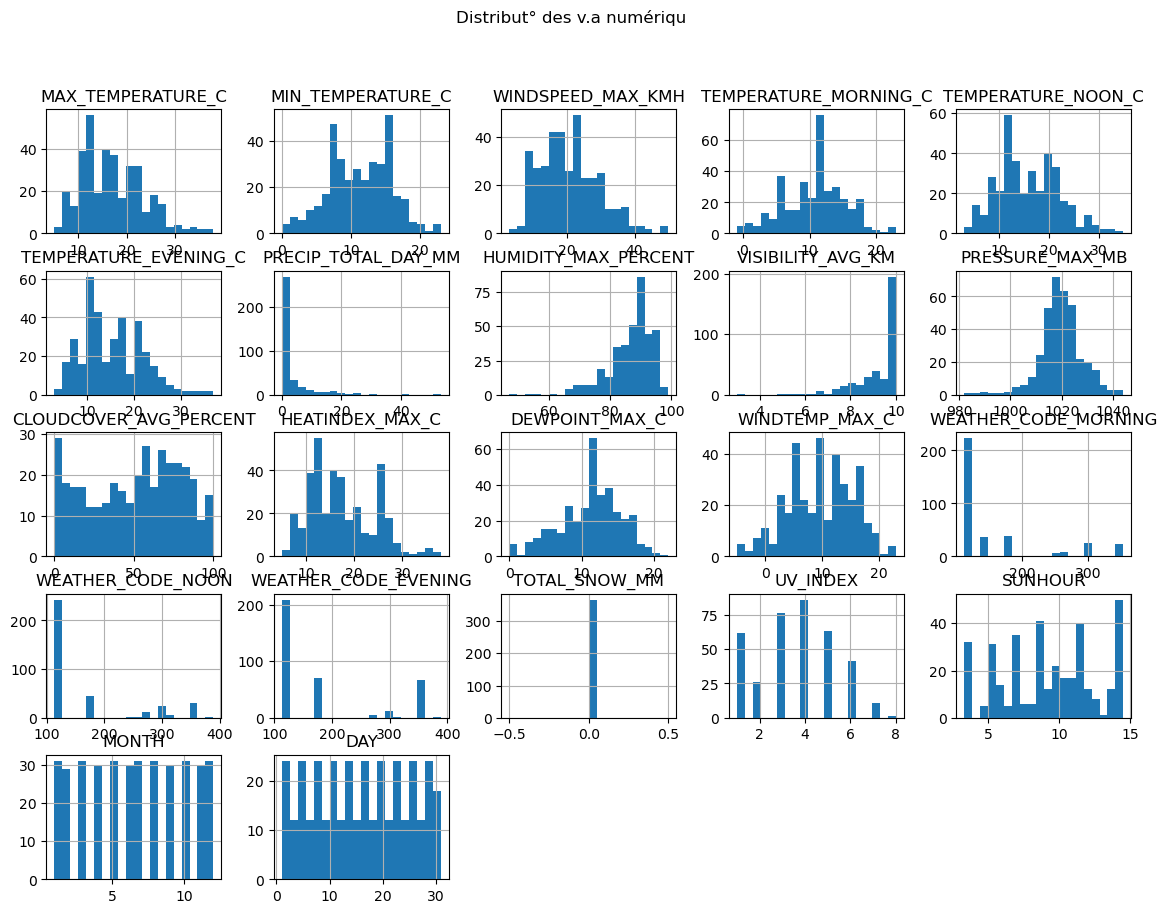

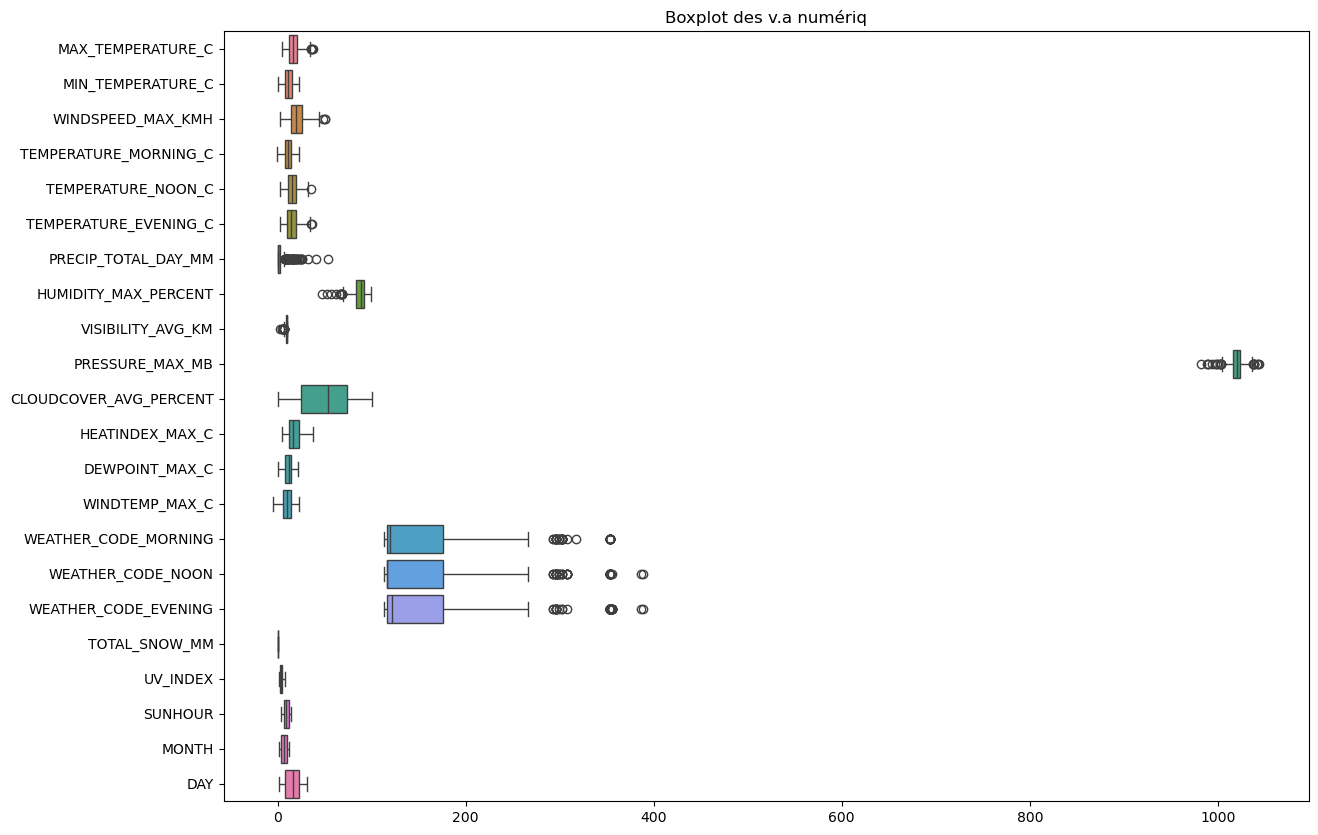

In [196]:
# Histogrammes pr chaq v.a numériq :
df.hist(figsize=(14, 10), bins=20)
plt.suptitle("Distribut° des v.a numériqu")
plt.show()

# Boxplots pr chaq v.a numériq pr visualiser les outliers :
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot des v.a numériq")
plt.show()

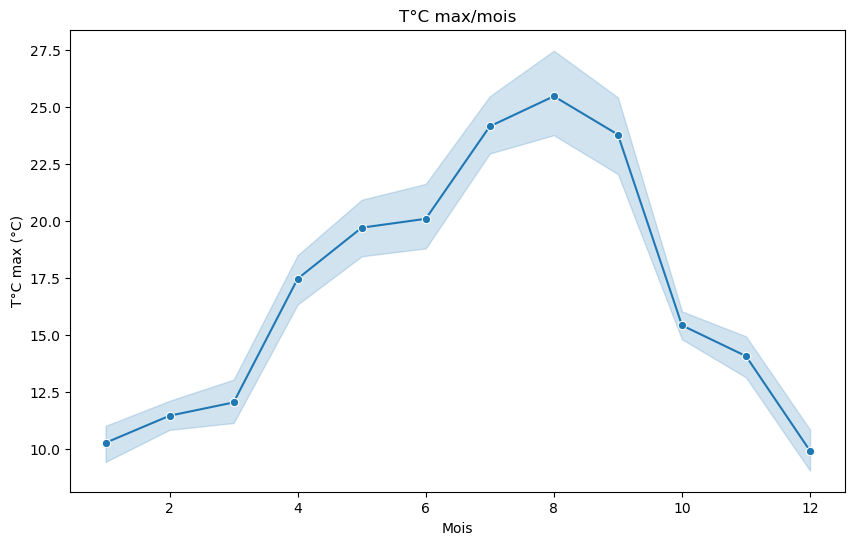

In [197]:
# Convertir la colonne DATE en datetime :
df['DATE'] = pd.to_datetime(df['DATE'])

# Extraire le mois et l'année :
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

# Visualise les tendances tporelles (ex: T°C max/mois)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='MONTH', y='MAX_TEMPERATURE_C', marker='o')
plt.title("T°C max/mois")
plt.xlabel("Mois")
plt.ylabel("T°C max (°C)")
plt.show()

In [203]:
# Créer 1 slice X avec uniquemt les colonnes numériq :
X = df.select_dtypes(include='number')

# Vérifie la taille du slice X :
print(f"Shape de X (colonnes numériques) : {X.shape}")

Shape de X (colonnes numériques) : (366, 23)


In [204]:
# Créer 1 slice y avec uniquemt la colonne OPINION :
y = df['OPINION']

# Vérifier la taille du slice y
print(f"Shape de y (colonne OPINION) : {y.shape}")
# y doit avoir 366 lignes

Shape de y (colonne OPINION) : (366,)


In [206]:
# Créer 1 slice X avec uniquemt les colonnes numériq :
X = df.select_dtypes(include='number')

# Initialise le scaler
scaler = StandardScaler()

# Mettre à l'échelle les données numériq :
X_scaled = scaler.fit_transform(X)

# Vérifie la taille du slice X_scaled :
print(f"Shape de X_scaled (données mises à l'échelle) : {X_scaled.shape}")
# X_scaled doit avoir 366 lignes et 22 colonnes

Shape de X_scaled (données mises à l'échelle) : (366, 23)


In [207]:
# Entrainemt du mdèle PCA et créat° du Dataset (avec moins de dimens°):
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(366, 10)

In [208]:
# Tx de variance expliq pr chaq nvelle dimens° :
pca.explained_variance_ratio_

array([0.40997413, 0.20876414, 0.06448527, 0.05962773, 0.04577155,
       0.03909456, 0.0296727 , 0.02799569, 0.02501111, 0.02237989])

In [209]:
# Autre techniq créant le même nb de dimens° qu'initialement afin d'expliq le tx de variance de chaq dimens° :
pca = PCA()

# Entraîne le PCA sur les données stdardisées :
pca.fit(X_scaled)

# Affiche la variance expliq par chaq cposante prcipale :
print("Variance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)

# Affiche le nb de cposantes prcipales (pr vérifier) :
print(f"Nombre de composantes principales : {pca.n_components_}")

Variance expliquée par chaque composante :
[4.09974128e-01 2.08764137e-01 6.44852689e-02 5.96277270e-02
 4.57715483e-02 3.90945593e-02 2.96727035e-02 2.79956895e-02
 2.50111074e-02 2.23798923e-02 2.06096373e-02 1.72091698e-02
 1.06921087e-02 5.50690832e-03 5.23972301e-03 3.80814302e-03
 2.24566722e-03 7.91559882e-04 5.45015534e-04 4.08638014e-04
 1.66668050e-04 0.00000000e+00 0.00000000e+00]
Nombre de composantes principales : 23


In [210]:
pca = PCA(n_components=0.7)
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(366, 4)

In [ ]:
# On a 4 cposantes prcipales qui expliquet 70 % de la variance

In [211]:
pca = PCA(n_components=0.8)
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(366, 6)

In [ ]:
# On a 6 cposantes prcipales qui expliquet 80 % de la variance

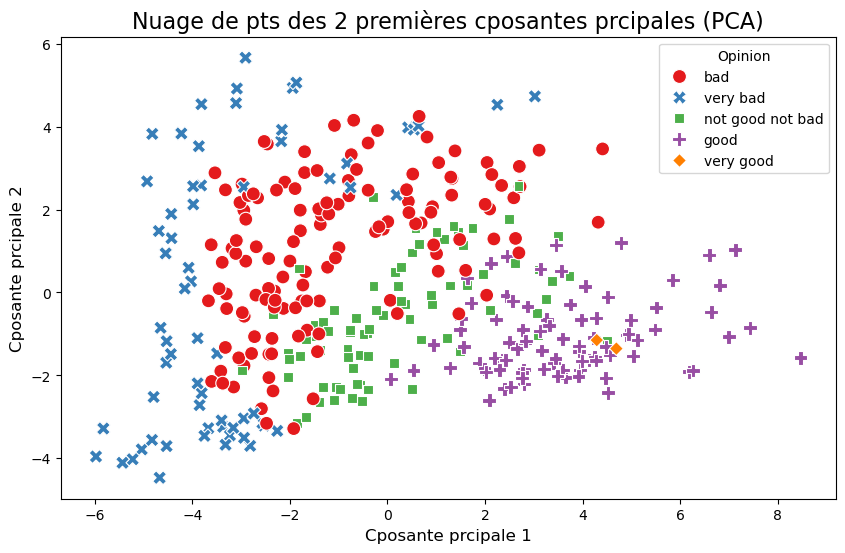

In [212]:
# Appliq PCA sur les données stdardisées :
# On veut seulemt les 2 premières cposantes
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Convertis X_pca en DataFrame pr faciliter l'affichage :
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Ajte la colonne OPINION au DataFrame pr colorier les points :
X_pca_df['OPINION'] = y

# Créer le nuage de points avec les 2 premières cposantes prcipales :
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='OPINION', palette='Set1', style='OPINION', s=100)

# Ajte 1 titre et des labels aux axes :
plt.title('Nuage de pts des 2 premières cposantes prcipales (PCA)', fontsize=16)
plt.xlabel('Cposante prcipale 1', fontsize=12)
plt.ylabel('Cposante prcipale 2', fontsize=12)

plt.legend(title='Opinion')
plt.show()

In [217]:
# Divise les données en ensbles d'entraînemt et de test (en utilisant X_scaled et y) :
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer le classifieur KNN et entraîne sur X_scaled :
# n_neighbors = 5 par déft
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)

# Prédict° et calcul du score sur le jeu de test :
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 3. Classificat° KNN sur les 2 premières cposantes prcipales :
X_train_pca, X_test_pca = X_pca[:len(X_train_scaled)], X_pca[len(X_train_scaled):]

# Entraîne le mdèle KNN sur les données PCA :
knn.fit(X_train_pca, y_train)

# Prédict° et calcul du score sur le jeu de test :
y_pred_pca = knn.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Score KNN avec X_scaled : {accuracy_scaled}")
print(f"Score KNN avec X_pca (2 premières cposantes) : {accuracy_pca}")

Score KNN avec X_scaled : 0.7837837837837838
Score KNN avec X_pca (2 premières cposantes) : 0.2972972972972973


In [218]:
# Divise les données en ensbles d'entraînemt et de test (en utilisant X_scaled et y) :
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer le classifieur KNN et entraîne sur X_scaled :
# n_neighbors = 5 par déft
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)

# Prédict° et calcul du score sur le jeu de test :
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 3. Classificat° KNN sur les 2 premières cposantes prcipales :
X_train_pca, X_test_pca = X_pca[:len(X_train_scaled)], X_pca[len(X_train_scaled):]

# Entraîne le mdèle KNN sur les données PCA :
knn.fit(X_train_pca, y_train)

# Prédict° et calcul du score sur le jeu de test :
y_pred_pca = knn.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Score KNN avec X_scaled : {accuracy_scaled}")
print(f"Score KNN avec X_pca (2 premières cposantes) : {accuracy_pca}")

Score KNN avec X_scaled : 0.7837837837837838
Score KNN avec X_pca (2 premières cposantes) : 0.2972972972972973


In [ ]:
# Le score est le même pour les 2 classificat° KNN.

In [213]:
# Encodage des colonnes ctégoriq en colonnes numériq :
df = pd.get_dummies(df, drop_first=True)

# Calcul matrice de corrélat° :
correlation_matrix = df.corr()

correlation_matrix

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY,YEAR,OPINION_good,OPINION_not good not bad,OPINION_very bad,OPINION_very good
DATE,1.000000,0.177906,0.103535,-0.120484,0.202411,0.193449,0.147007,0.007249,0.055399,0.114252,...,NaN,0.380763,-0.086903,0.996516,0.089710,NaN,0.042512,0.116256,-0.031181,0.034728
MAX_TEMPERATURE_C,0.177906,1.000000,0.849326,-0.327096,0.794239,0.985586,0.987956,-0.177971,-0.179855,0.063794,...,NaN,0.886651,0.642676,0.179669,0.000671,NaN,0.699320,0.013568,-0.467983,0.128225
MIN_TEMPERATURE_C,0.103535,0.849326,1.000000,-0.100506,0.935416,0.893272,0.842312,-0.013854,-0.074038,-0.091817,...,NaN,0.736483,0.439464,0.105662,-0.008460,NaN,0.501687,-0.028309,-0.507174,0.069780
WINDSPEED_MAX_KMH,-0.120484,-0.327096,-0.100506,1.000000,-0.015196,-0.279279,-0.339009,0.353478,-0.066974,-0.120787,...,NaN,-0.350733,-0.353471,-0.129531,0.095886,NaN,-0.322628,-0.123327,0.132757,-0.069408
TEMPERATURE_MORNING_C,0.202411,0.794239,0.935416,-0.015196,1.000000,0.847635,0.768743,0.079595,0.026395,-0.117264,...,NaN,0.666789,0.284882,0.205091,-0.016454,NaN,0.406332,-0.065868,-0.468682,0.078545
TEMPERATURE_NOON_C,0.193449,0.985586,0.893272,-0.279279,0.847635,1.000000,0.970373,-0.149084,-0.148386,0.035141,...,NaN,0.879551,0.601418,0.195348,-0.000693,NaN,0.663374,0.014165,-0.498202,0.132320
TEMPERATURE_EVENING_C,0.147007,0.987956,0.842312,-0.339009,0.768743,0.970373,1.000000,-0.188112,-0.183977,0.055457,...,NaN,0.876498,0.650588,0.149347,-0.006183,NaN,0.702596,0.000097,-0.465287,0.117657
PRECIP_TOTAL_DAY_MM,0.007249,-0.177971,-0.013854,0.353478,0.079595,-0.149084,-0.188112,1.000000,0.247810,-0.401747,...,NaN,-0.175698,-0.331804,0.014350,-0.086687,NaN,-0.252793,-0.179479,0.447981,-0.036707
HUMIDITY_MAX_PERCENT,0.055399,-0.179855,-0.074038,-0.066974,0.026395,-0.148386,-0.183977,0.247810,1.000000,-0.415754,...,NaN,-0.214630,-0.376029,0.067055,-0.144309,NaN,-0.310499,0.082646,-0.015023,0.008868
VISIBILITY_AVG_KM,0.114252,0.063794,-0.091817,-0.120787,-0.117264,0.035141,0.055457,-0.401747,-0.415754,1.000000,...,NaN,0.147103,0.234744,0.106498,0.096751,NaN,0.166699,0.078342,-0.040247,0.053459


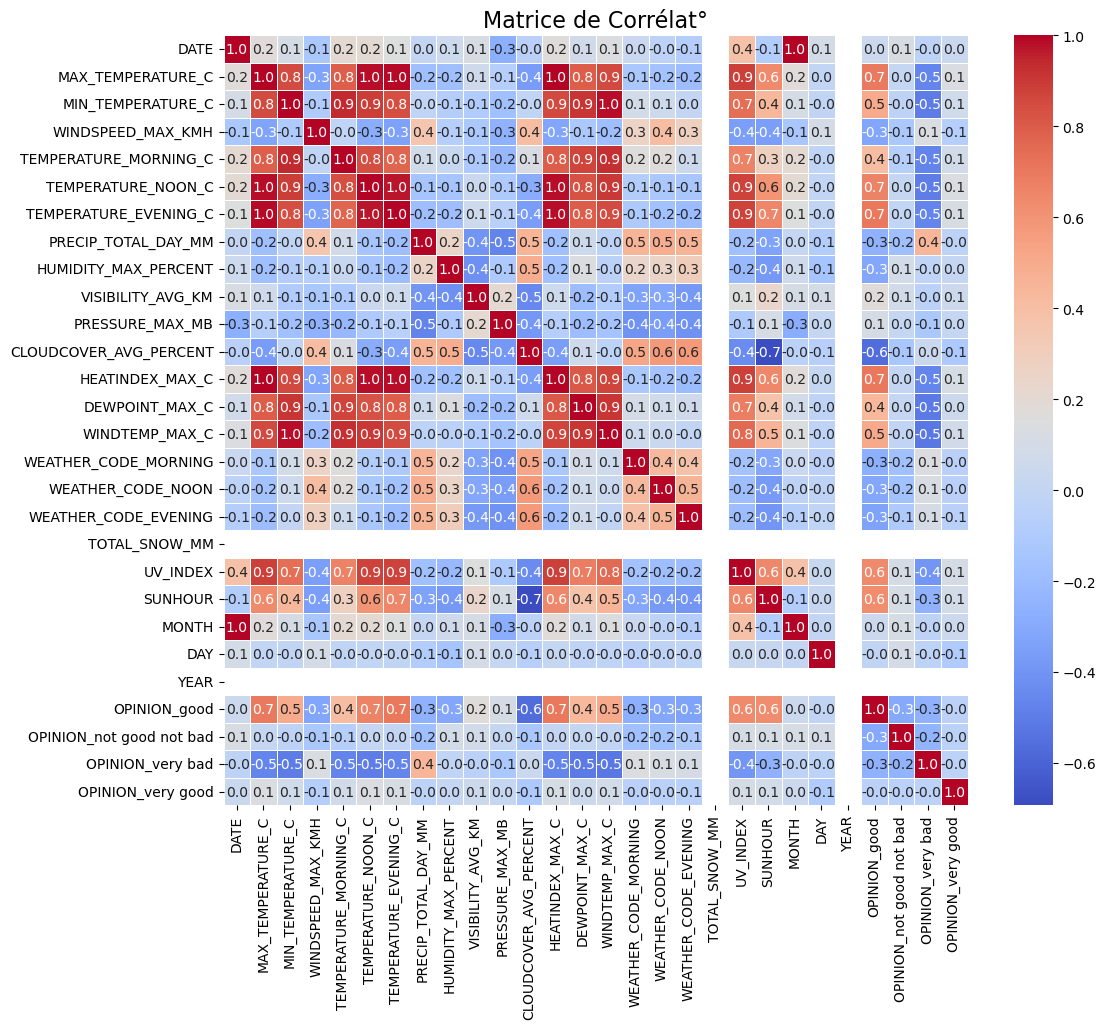

In [214]:
plt.figure(figsize=(12, 10))

# Génére la heatmap avec ajustemts pr 1 meilleure lisibilité :
sns.heatmap(df.corr(), 
# Affiche les vleurs ds les c :
            annot=True,
# Palette de cleurs :          
            cmap='coolwarm',
# Frmat des vleurs (1 décimales) :           
            fmt=".1f",
# Lignes entre les c :            
            linewidths=0.5)       

plt.title("Matrice de Corrélat°", fontsize=16)
plt.show()